In [1]:
# !pip install pyspark

In [2]:
# import os
# from pyspark.sql import SparkSession

In [3]:
# spark_home = "D:\Ali_Kolya\FIFA_Players_Analysis"

In [4]:
# os.environ["SPARK_HOME"] = spark_home

# # Add Spark bin and executors to PATH
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "bin")
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "sbin")

# # Add Spark Python libraries to PYTHONPATH
# os.environ["PYTHONPATH"] = os.path.join(spark_home, "python") + os.pathsep + os.environ.get("PYTHONPATH", "")
# os.environ["PYTHONPATH"] += os.pathsep + os.path.join(spark_home, "python", "lib")

# # Add PySpark to the system path
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "pyspark.zip")
# os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "py4j-0.10.9-src.zip")

# os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
# os.environ['PYSPARK_PYTHON'] = 'python'

In [5]:
# # Create a SparkSession
# spark = SparkSession.builder \
#     .appName("PySpark-Script") \
#     .getOrCreate()

In [6]:
# data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
# rdd = spark.sparkContext.parallelize(data)
# rdd_length = len(rdd.collect())
# print("Total number of elements: ", rdd_length)

# Data Cleaning

# Preprocessing

# Feature Extraction

# EDA

# Model Development

# Reading the Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('Data/male_players_23.csv')
df = pd.read_csv('Data/male_players (legacy)_23.csv')
print(len(df))


161583


C:\Users\DELL\AppData\Local\Temp\ipykernel_7920\2782358923.py:7: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/male_players (legacy)_23.csv')


In [8]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


<Axes: >

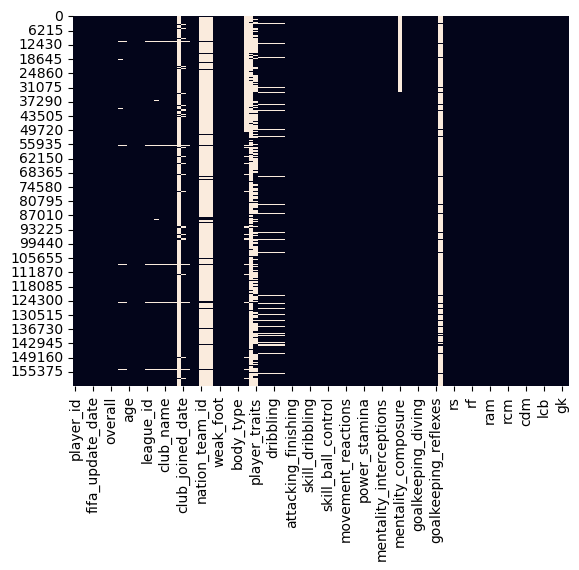

In [10]:
# sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [33]:
# Total number of nulls = 1218702
df.isnull().sum().sum()

41732

In [45]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                285
mentality_composure    31931
dtype: int64


In [13]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_loaned_from                  94.097151
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
nation_team_id                    94.234542
nation_position                   94.234542
nation_jersey_number              94.234542
release_clause_eur                35.870729
player_tags                       92.163161
player_traits                     54.729148
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                       

In [14]:
# Handling a few nulls
'''
11.120601 +  88.879399 = 100
'pace' -----> 'goalkeeping_speed'
'shooting' -----> 'goalkeeping_kicking
'passing' -----> 20
'dribbling' -----> 22
'defending' -----> 14
'physic' -----> 64          # mean instead of min, as GK's aren't that bad
'''
# pace = max(pace, goalkeeping_speed)
df['pace'] = df[['pace', 'goalkeeping_speed']].max(axis = 1)
df['shooting'] = df[['shooting', 'goalkeeping_kicking']].max(axis = 1)

# fill nulls with 20
df['passing'].fillna(df['passing'].min(), inplace = True)
df['dribbling'].fillna(df['dribbling'].min(), inplace = True)
df['defending'].fillna(df['defending'].min(), inplace = True)
df['physic'].fillna(df['physic'].mean(), inplace = True)

In [15]:
# Drop columns with more than 33% missing values
df = df.dropna(thresh = len(df) / 3 * 2, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
mentality_composure               20.336917
dtype: float64


In [16]:
# Check nulls in 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'
# Check if they are the same rows 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number' 
print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
# All of them are null in the same rows. So we could drop them

# Calculate percentage of nulls in these columns
# print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum() / len(df) * 100)

# Drop these empty rows
df = df.dropna(subset = ['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'])

1773


In [44]:
df = df.dropna(subset = ['league_level'])

In [38]:
# Check nulls in 'gk'
print(df['gk'].isnull().sum())
# Check if there is null in 'gk' and position == goalkeeper
print(df['player_positions'][df['gk'].isnull()].str.contains('GK').sum())
# Some of them are goalkeepers


0
0


In [36]:
# Set df['gk'] nulls to the average of  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

df.loc[df['gk'].isnull(), 'gk'] = df[df['gk'].isnull()][['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis = 1)

In [19]:
# See a few rows where 'value_eur' is null
df[df['value_eur'].isnull()].head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
530,3622,/player/3622/ricardo-alberto-silv-de-carvalho/...,15,2,2014-09-18,Ricardo Carvalho,Ricardo Alberto Silveira de Carvalho,CB,77,77,...,69+1,69+1,64+1,69+1,76+1,76+1,76+1,69+1,16+1,https://cdn.sofifa.net/players/003/622/15_120.png
532,26992,/player/26992/sylvain-distin/150002,15,2,2014-09-18,S. Distin,Sylvain Distin,CB,77,77,...,71,71,67,72,77,77,77,72,11,https://cdn.sofifa.net/players/026/992/15_120.png
559,153260,/player/153260/vitorino-hilton-da-silva/150002,15,2,2014-09-18,Hilton,Vitorino Hilton da Silva,CB,77,77,...,73,73,70,73,77,77,77,73,14,https://cdn.sofifa.net/players/153/260/15_120.png
688,23461,/player/23461/walter-samuel/150002,15,2,2014-09-18,W. Samuel,Walter Adrián Samuel Luján,CB,76,76,...,67,67,60,66,76,76,76,66,11,https://cdn.sofifa.net/players/023/461/15_120.png
1163,10764,/player/10764/juan-francisco-garcia-garcia/150002,15,2,2014-09-18,Juanfran,Juan Francisco García García,"CB, LB",74,74,...,70,70,70,72,74,74,74,72,11,https://cdn.sofifa.net/players/010/764/15_120.png


In [20]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

value_eur                         float64
wage_eur                          float64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_joined_date                   object
club_contract_valid_until_year    float64
mentality_composure               float64
dtype: object

In [21]:
# get info about this column
# df['release_clause_eur']


In [22]:
# Check nulls in pace, shooting, passing, dribbling, defending, physic
# Check if they are the same rows
print(df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1).sum())
# All of them are null in the same rows. So we could drop them
print(df[df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1)]['player_positions'].count())
print(len(df[df['player_positions'] == 'GK']))
# We notice all of them are goal keepers


0
0
17696


In [23]:
df['value_eur'].describe()
# get player with max value
# df[df['value_eur'] == df['value_eur'].max()]
# get 5 players with max value
df.nlargest(5, 'value_eur')


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
123817,231747,/player/231747/kylian-mbappe/220002,22,2,2021-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png
143054,231747,/player/231747/kylian-mbappe/230002,23,2,2022-09-26,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png
104935,231747,/player/231747/kylian-mbappe/210002,21,2,2020-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW, RW",90,95,...,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/21_120.png
143078,239085,/player/239085/erling-haaland/230002,23,2,2022-09-26,E. Haaland,Erling Braut Haaland,ST,88,94,...,64+3,64+3,62+3,61+3,62+3,62+3,62+3,61+3,19+3,https://cdn.sofifa.net/players/239/085/23_120.png
123840,239085,/player/239085/erling-haaland/220002,22,2,2021-09-23,E. Haaland,Erling Braut Haaland,ST,88,93,...,63+3,63+3,62+3,60+3,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png


In [24]:
df['mentality_composure'].describe()

count    127420.000000
mean         57.804097
std          12.312328
min           3.000000
25%          50.000000
50%          59.000000
75%          66.000000
max          96.000000
Name: mentality_composure, dtype: float64

# Target Encoding

In [25]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

In [26]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object')

In [27]:
# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])


In [28]:
# loop on all the position attrributes and remove the + and whatever comes after
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    df[col] = df[col].str.split('+').str[0]
    df[col] = df[col].str.strip()
for col in positions:
    df[col] = df[col].str.split('-').str[0]
    df[col] = df[col].str.strip()
    df[col] = df[col].astype(float)


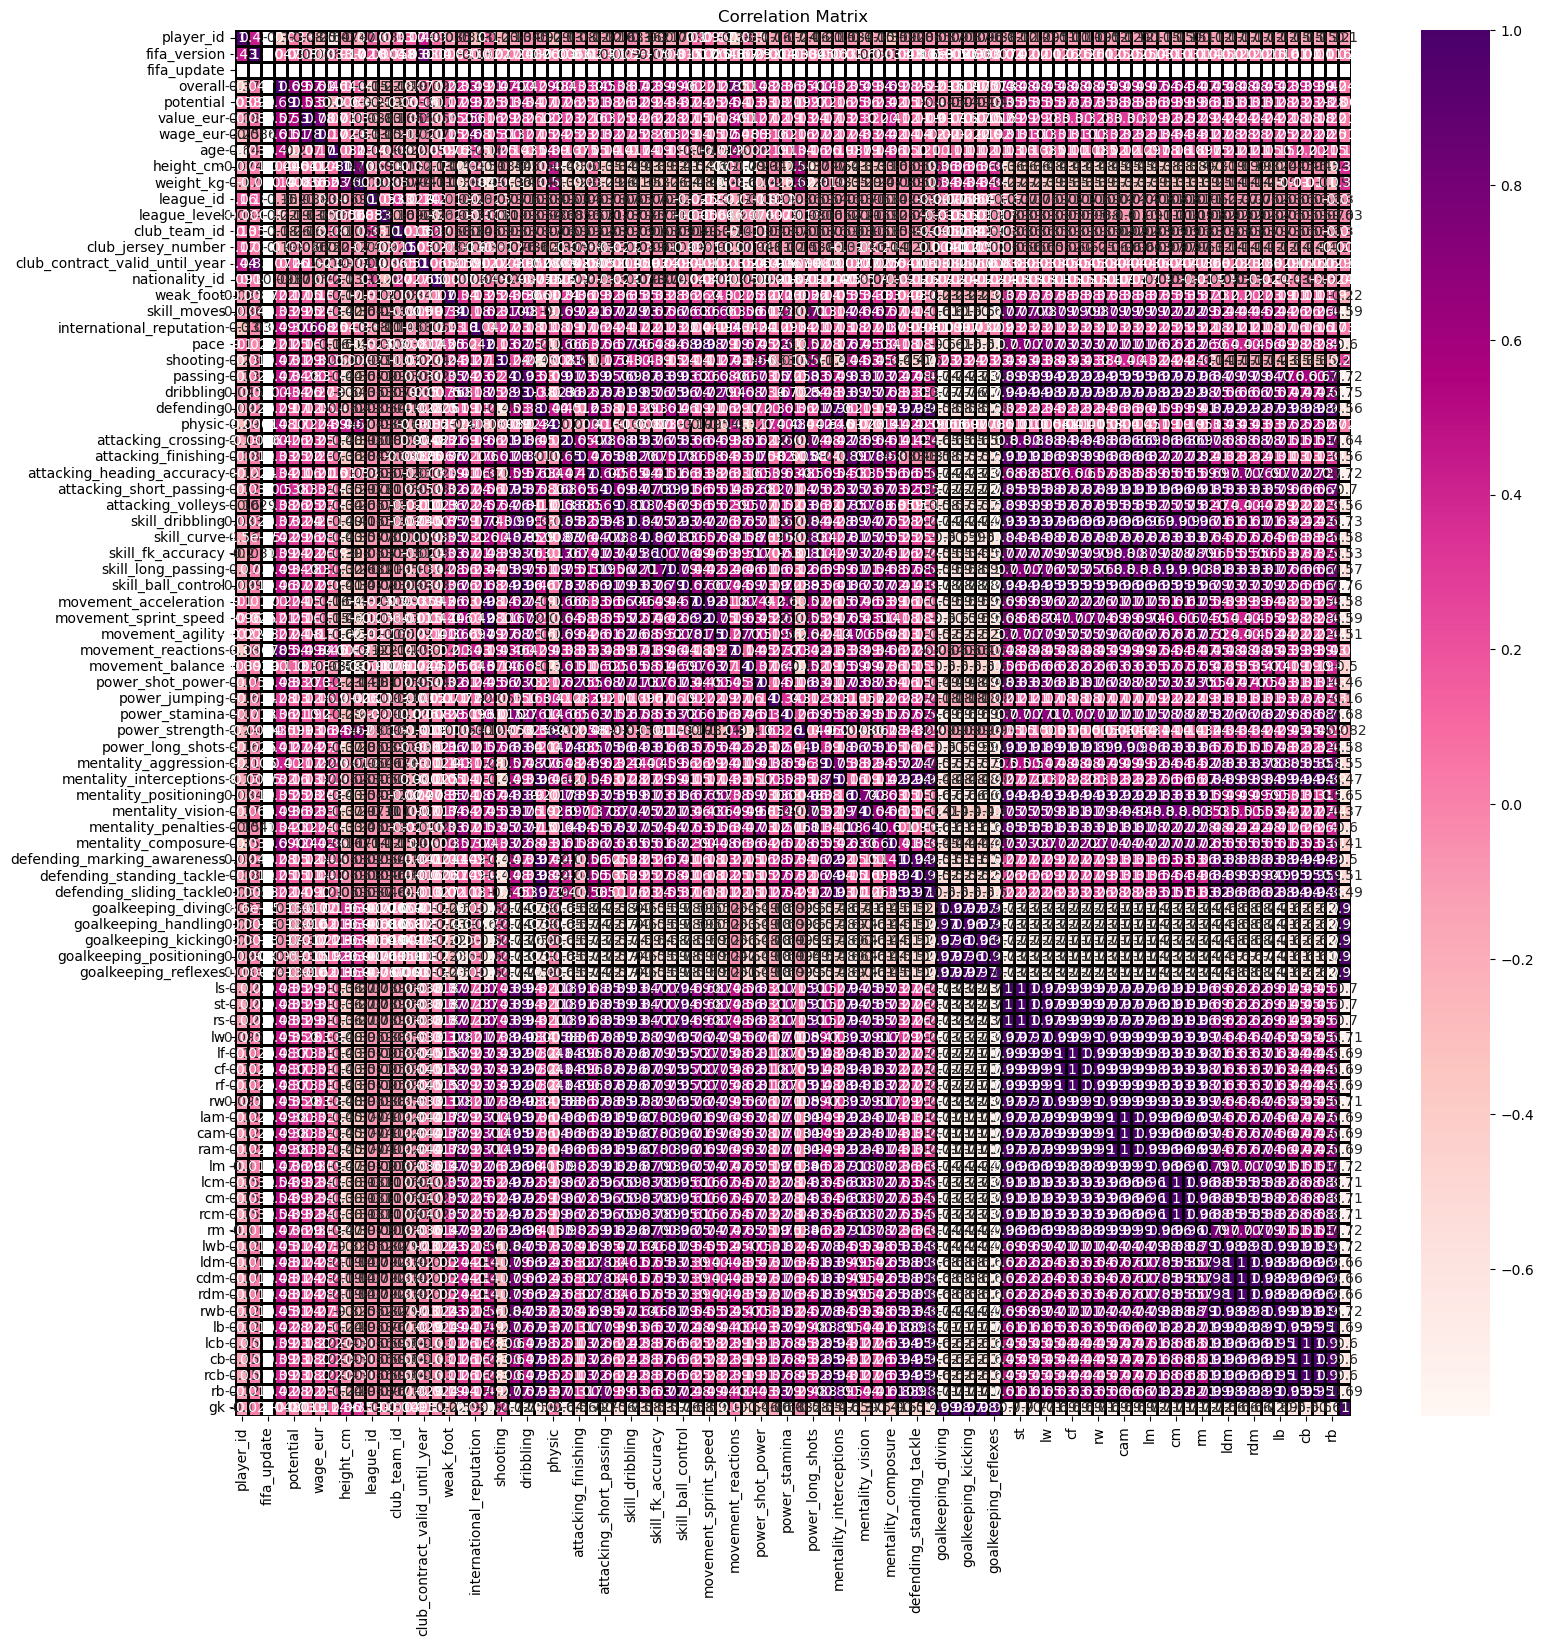

In [29]:
# making a heatmap of the correlation matrix
df2 = df.copy()
# dropping the categorical columns
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, annot = True, cmap='RdPu', linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Both of these columns are not useful, as they are not related any other column
df = df.drop(columns = ['fifa_update', 'fifa_version'])

In [31]:
df2 = df.copy()
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

correlation_with_val_eur = np.abs(df2.corrwith(df2['value_eur']))            # absolute to handle -ve values
sorted_correlations = correlation_with_val_eur.sort_values(ascending=False)
# Take top correlations > 0.25
top_correlations = sorted_correlations[sorted_correlations > 0.25]
# print(top_15_correlations.index.tolist())
print(len(top_correlations))
print(top_correlations)

33
value_eur                   1.000000
wage_eur                    0.777969
international_reputation    0.604004
overall                     0.566789
potential                   0.533830
movement_reactions          0.490416
mentality_composure         0.397095
mentality_vision            0.320279
cm                          0.315670
lcm                         0.315670
rcm                         0.315670
lam                         0.304342
cam                         0.304342
ram                         0.304342
rf                          0.297851
cf                          0.297851
lf                          0.297851
attacking_short_passing     0.295461
shooting                    0.294337
lm                          0.290880
rm                          0.290880
st                          0.290574
rs                          0.290574
ls                          0.290574
lw                          0.283236
rw                          0.283236
passing                     0.27674

In [32]:
df.columns

Index(['player_id', 'short_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'league_id',
       'league_name', 'league_level', 'club_team_id', 'club_name',
       'club_position', 'club_jersey_number', 'club_contract_valid_until_year',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shot